In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df=pd.read_csv("../data/raw/players.csv")
df.head()

,avg_session_time,sessions_per_week,levels_completed,time_to_complete_level,death_rate,retry_rate,accuracy,exploration_score,aggression_score,completion_rate
0,24.483571,3.519347,11.231207,14.605391,3.662881,1.450595,46.108336,0.417521,0.200000,60.124993
1,21.308678,4.532739,3.159326,14.602969,4.173474,0.469670,56.972038,0.600000,0.200000,75.000000
2,25.238443,2.891240,4.607258,14.713460,3.181022,0.145797,58.985774,0.436748,0.339313,43.314007
3,29.615149,3.401712,12.973056,24.306992,1.703168,0.000000,64.121192,0.368647,0.445769,70.587285
4,20.829233,3.690144,10.683462,17.527742,3.399688,0.000000,67.644325,0.492180,0.200000,58.271983


In [2]:
df.shape

(1200, 10)

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_session_time        1200 non-null   float64
 1   sessions_per_week       1200 non-null   float64
 2   levels_completed        1200 non-null   float64
 3   time_to_complete_level  1200 non-null   float64
 4   death_rate              1200 non-null   float64
 5   retry_rate              1200 non-null   float64
 6   accuracy                1200 non-null   float64
 7   exploration_score       1200 non-null   float64
 8   aggression_score        1200 non-null   float64
 9   completion_rate         1200 non-null   float64
dtypes: float64(10)
memory usage: 93.9 KB


In [4]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
avg_session_time,1200.0,52.695018,28.027467,10.0,25.786051,48.840223,76.508221,130.0
sessions_per_week,1200.0,4.142444,1.400804,1.0,3.075322,4.089262,5.164373,7.0
levels_completed,1200.0,23.111291,13.667737,2.0,12.462937,19.842329,30.109584,65.0
time_to_complete_level,1200.0,14.096643,6.919290,2.5,7.337704,14.186931,18.704398,35.0
death_rate,1200.0,2.738631,1.647197,0.0,1.467982,2.770290,3.789658,8.0
retry_rate,1200.0,1.529723,1.321101,0.0,0.502749,1.136430,2.246521,7.0
accuracy,1200.0,67.481888,14.124274,40.0,57.309148,64.385909,78.834219,98.0
exploration_score,1200.0,0.453277,0.257172,0.0,0.284950,0.395050,0.557615,1.0
aggression_score,1200.0,0.525861,0.220693,0.1,0.353601,0.489333,0.686814,1.0
completion_rate,1200.0,73.280981,15.426300,40.0,61.337044,73.343775,87.844089,99.0


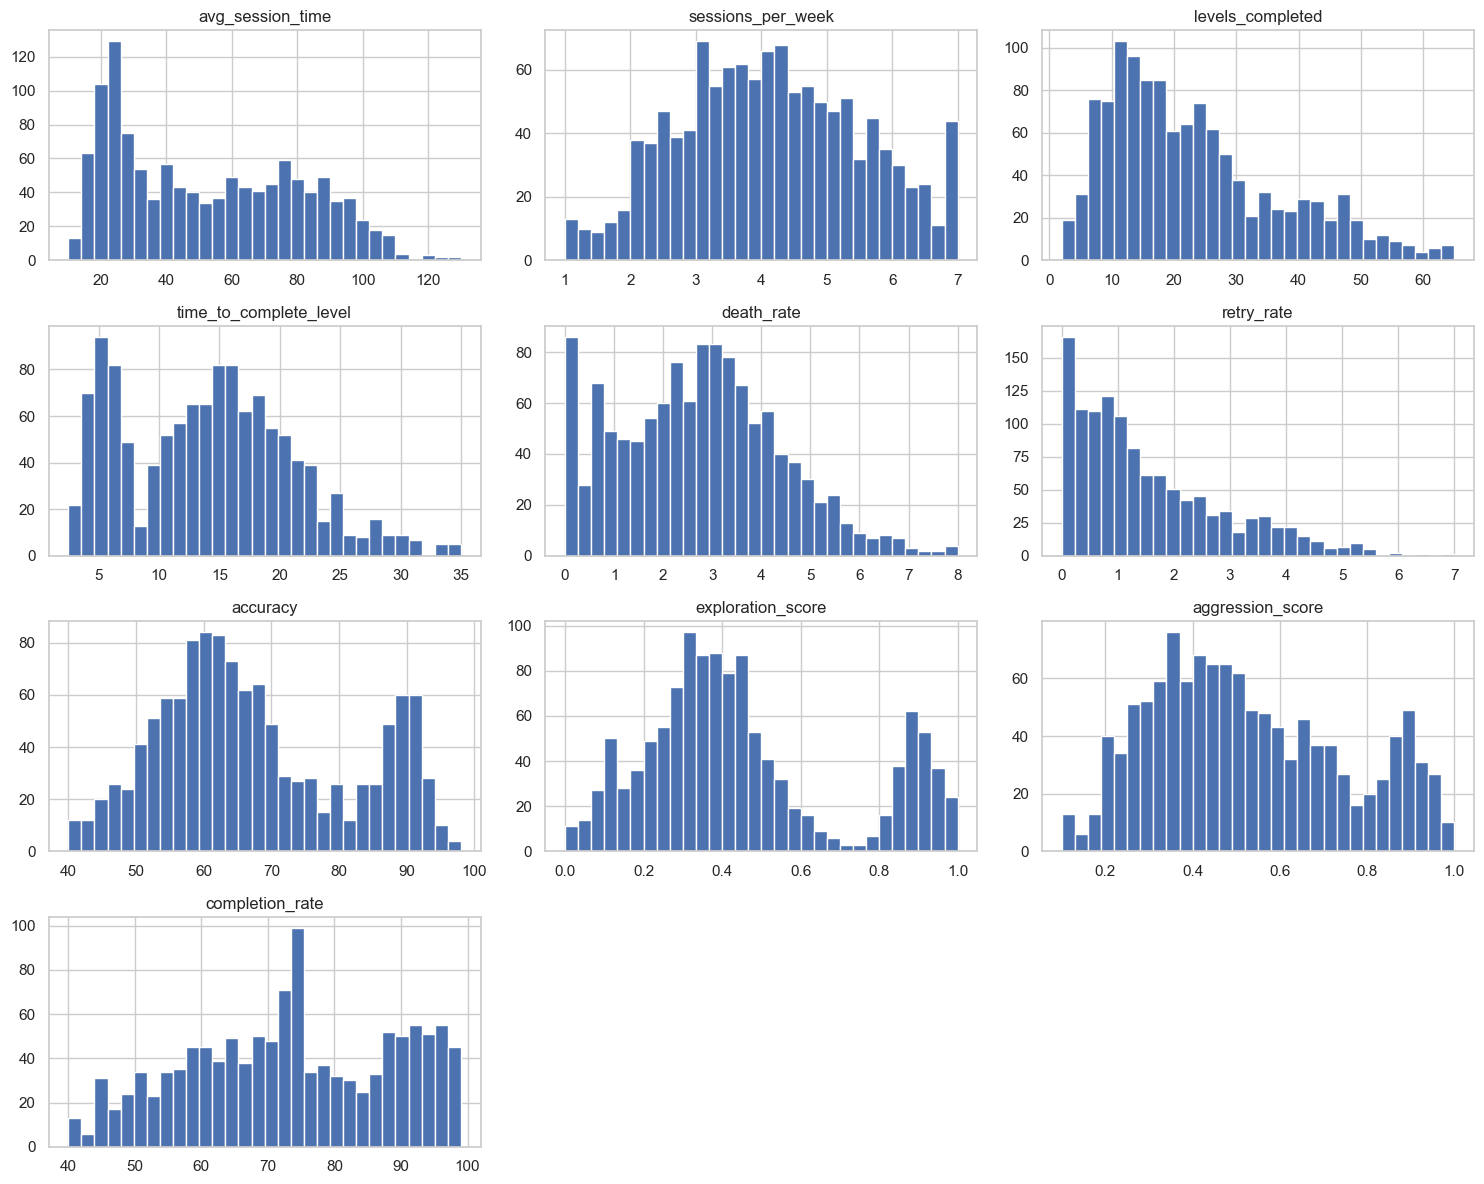

In [5]:
df.hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()


In [6]:
corr = df.corr()
corr


,avg_session_time,sessions_per_week,levels_completed,time_to_complete_level,death_rate,retry_rate,accuracy,exploration_score,aggression_score,completion_rate
avg_session_time,1.000000,0.504317,0.531807,-0.067465,-0.351279,0.209697,0.496044,0.290439,0.127659,0.554078
sessions_per_week,0.504317,1.000000,0.606931,-0.407526,-0.288502,0.245700,0.574936,-0.195770,0.309432,0.569532
levels_completed,0.531807,0.606931,1.000000,-0.528602,-0.491915,0.128109,0.786859,-0.227117,0.298715,0.735077
time_to_complete_level,-0.067465,-0.407526,-0.528602,1.000000,0.170665,-0.060074,-0.529978,0.692493,-0.543372,-0.369670
death_rate,-0.351279,-0.288502,-0.491915,0.170665,1.000000,0.264330,-0.548628,-0.111409,0.211807,-0.578569
retry_rate,0.209697,0.245700,0.128109,-0.060074,0.264330,1.000000,0.048856,-0.057168,0.157311,0.119005
accuracy,0.496044,0.574936,0.786859,-0.529978,-0.548628,0.048856,1.000000,-0.220199,0.269943,0.739363
exploration_score,0.290439,-0.195770,-0.227117,0.692493,-0.111409,-0.057168,-0.220199,1.000000,-0.570306,-0.040492
aggression_score,0.127659,0.309432,0.298715,-0.543372,0.211807,0.157311,0.269943,-0.570306,1.000000,0.062321
completion_rate,0.554078,0.569532,0.735077,-0.369670,-0.578569,0.119005,0.739363,-0.040492,0.062321,1.000000


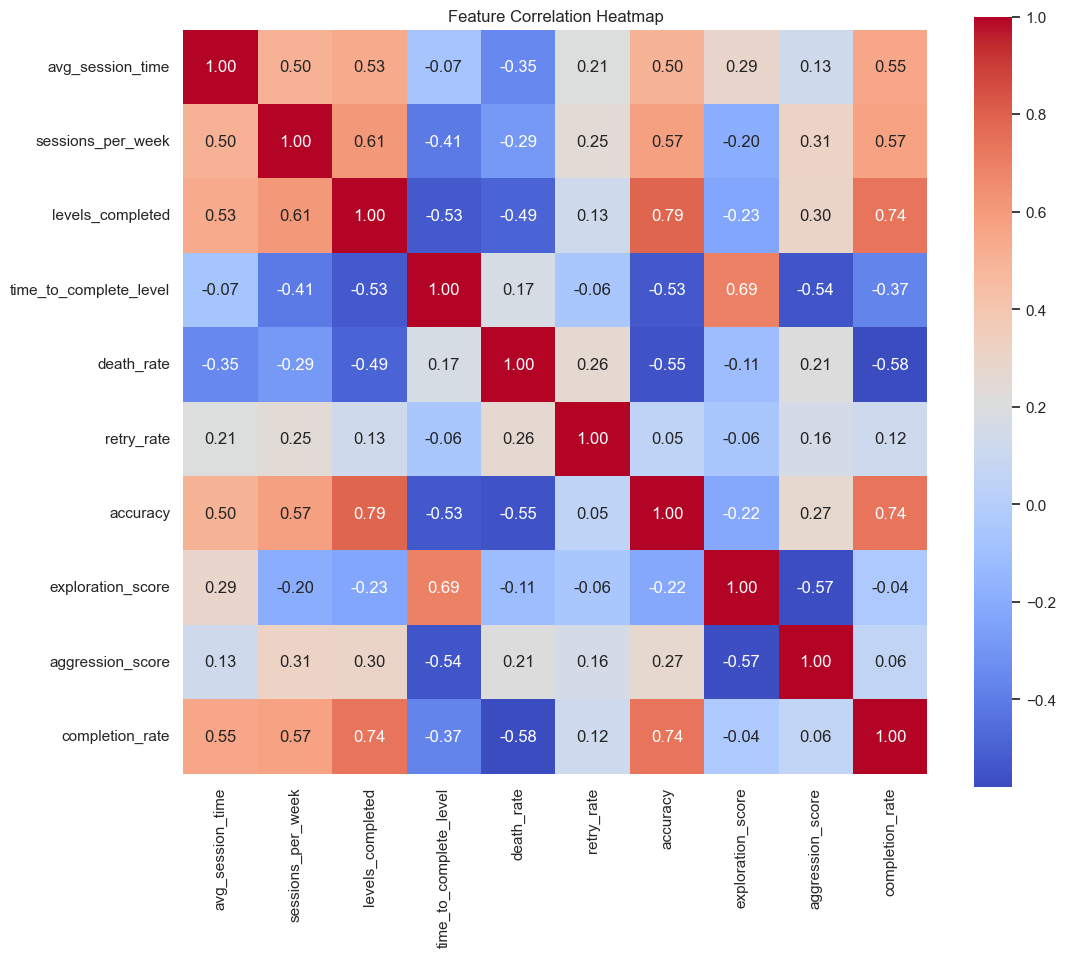

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True
)
plt.title("Feature Correlation Heatmap")
plt.show()
